In [23]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [39]:
from dumbrain.lib.accuracy import Algorithm, TestSetGenerator, Test, TestSet, testAlgorithm, LogHandler, SQLOutputHandler, loadSQLHistory
from dumbrain.lib.accuracy.plot import plotTestSetHistory, plotTestSetHistoryAgainstParameter

In [25]:
sqlite_filename = './accuracy_explorer.sql'

In [62]:
class SometimesDoubleAlgorithm( Algorithm ):
    def _run( self, input, parameters ):
        if input < parameters[ 'threshold' ] - 1:
            return input * 2
        return input

In [63]:
class SequentialTestSetGenerator( TestSetGenerator ):
    def generate( self ):
        tests = []
        for i in range( 9 ):
            tests.append( Test( i, i*2, id=( 'test_' + str( i ) ) ) )
        return TestSet( tests )

In [50]:
algorithm = SometimesDoubleAlgorithm(
    id='SometimesDouble',
    version='0.1',
    description='Doubles sometimes?',
    parameters={
        'threshold': 7
    },
)
generator = SequentialTestSetGenerator()

sql_handler = SQLOutputHandler( sqlite_filename )

testAlgorithm( algorithm, generator, output_handlers=[ LogHandler(), sql_handler ] )

Individual tests: 
	 test_0 {'valid': 1}
	 test_1 {'valid': 1}
	 test_2 {'valid': 1}
	 test_3 {'valid': 1}
	 test_4 {'valid': 1}
	 test_5 {'valid': 1}
	 test_6 {'valid': 0}
	 test_7 {'valid': 0}
	 test_8 {'valid': 0}
Test set:
	 {'percent_correct': 0.6666666666666666}


In [51]:
algorithm = SometimesDoubleAlgorithm(
    id='SometimesDouble',
    version='0.1',
    description='Doubles sometimes?',
    parameters={
        'threshold': 8
    },
)
testAlgorithm( algorithm, generator, output_handlers=[ LogHandler(), sql_handler ] )

Individual tests: 
	 test_0 {'valid': 1}
	 test_1 {'valid': 1}
	 test_2 {'valid': 1}
	 test_3 {'valid': 1}
	 test_4 {'valid': 1}
	 test_5 {'valid': 1}
	 test_6 {'valid': 1}
	 test_7 {'valid': 0}
	 test_8 {'valid': 0}
Test set:
	 {'percent_correct': 0.7777777777777778}


In [59]:
test_set_history = loadSQLHistory( sqlite_filename )

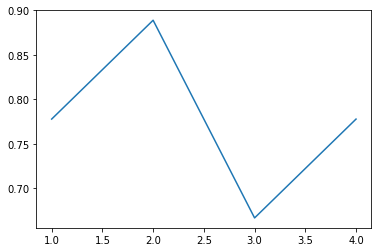

In [60]:
plotTestSetHistory( test_set_history, 'percent_correct' )

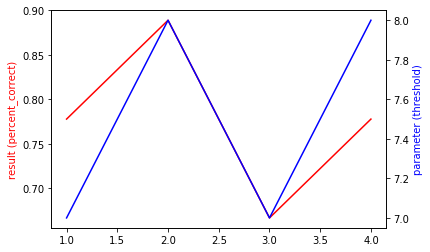

In [61]:
plotTestSetHistoryAgainstParameter( test_set_history, 'percent_correct', 'threshold' )